In [149]:
hw_done = True   ## change this to True to mark your homework as done.

# Homework 2

### ASTR-324, University of Washington


## Problem 1

The file `data/flux.txt` contains a series of calibrated measurements of the flux of a star (in some arbitrary flux units).

Assuming the star is not variable, estimate:
1. the true stellar flux and the error of that estimate and
1. the precision of my measurement apparatus.

## Problem 2

Test scores in ASTR 324 class at the University of Washington have historically been normally distributed with $\mu = 85$ and $\sigma=7$. Assuming past predicts the future:

1. Compute the probability you will score 100 or greater when you take the test.
1. Compute the number of your classmates who will score between 84 and 92 (the class has 26 students; assume everyone will take the test).
1. If I tell you the probability of failing the test (i.e., scoring below some threshold $T$) is 0.018%, compute the threshold $T$.

Note: you should find [the functions of `scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) very useful.

## Problem 3

Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. Do the same for a Cauchy distribution with the same $\mu$ and $\gamma=0.2$. 

"Poissonian uncertainty": for each bin in the histogram, plot the error bar whose half-width is the square root of the bin height.

## Problem 4
Repeat the previous problem, but now concatenate wit the Gaussian sample 
another sample of 10,000 data values drawn from a Cauchy distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Discuss the difference.  

<br>
# Solutions

### Some useful definitions and functions

In [150]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm, sem
import seaborn as sns; sns.set() # set default plot styles
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)

## Problem 1

In [151]:
import pandas as pd

In [152]:
flux_data = pd.read_csv('./data/flux.txt', header = None) #read text file

In [153]:
print(flux_data) #print flux_data

         0
0   39.967
1   33.617
2   41.477
3   50.230
4   32.658
..     ...
95  20.365
96  37.961
97  37.611
98  35.051
99  32.654

[100 rows x 1 columns]


In [154]:
true_flux = flux_data.mean().values #calculate mean ~ true stellar flux.
apparatus_precision = flux_data.std().values #calculate standard deviation ~ precision of measurement apparatus.
sem_estimate = flux_data.sem().values #unbiased standard error of our mean.

In [155]:
print('True stellar flux:', true_flux)
print('The precision of my measurement apparatus:', apparatus_precision)
print('Error of our estimate:', sem_estimate)

True stellar flux: [33.96153]
The precision of my measurement apparatus: [9.08160887]
Error of our estimate: [0.90816089]


## Problem 2

In [156]:
import scipy.stats

In [157]:
#Test scores normally distributed with 𝜇=85 and 𝜎=7.
#Compute the probability you will score 100 or greater when you take the test.

distribution = scipy.stats.norm(85,7) #mu,sigma
probability_greater_100 = 1 - distribution.cdf(100) #cumulative distribution function.
precentage_greater_100 = probability_greater_100 * 100 #percentage
print('The probability a student will score 100 or greater =', precentage_greater_100, '% probability')

The probability a student will score 100 or greater = 1.6062285603828275 % probability


In [158]:
#Compute the number of your classmates who will score between 84 and 92. 
#(the class has 26 students; assume everyone will take the test).

probability_between_84_and_92 = (1-distribution.cdf(84)) - (1-distribution.cdf(92))
print('Probability of students who will score between 84 and 92:', probability_between_84_and_92 * 100, '% probability') 
number_classmates_between_84_and_92 = probability_between_84_and_92 * 26
print(f'number_classmates_between_84_and_92: {number_classmates_between_84_and_92:.0f} classmates')

Probability of students who will score between 84 and 92: 39.81432428850111 % probability
number_classmates_between_84_and_92: 10 classmates


In [159]:
#If I tell you the probability of failing the test 
#(i.e., scoring below some threshold_𝑇 ) is 0.018%, compute the threshold_𝑇.

threshold_T = distribution.ppf(0.018/100)
print('Given that the probability of failing the test is 0.018 %, our calculated threshold should be:', threshold_T, '%')

Given that the probability of failing the test is 0.018 %, our calculated threshold should be: 60.025445320586925 %


## Problem 3

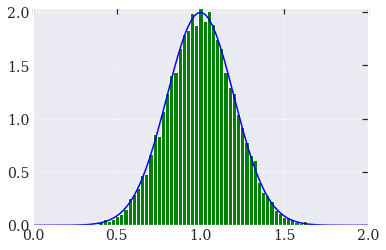

In [160]:
mu = 1.0
sigma = 0.2
np.random.seed(42)
sampleSize = 10000

gaussian = norm(mu,sigma).rvs(sampleSize);

fig,ax = plt.subplots(1,1)

ax.hist(gaussian, bins = "fd", density = True, color='green');

xAxis = np.linspace(0, 2, sampleSize)

ax.plot(xAxis, norm(mu, sigma).pdf(xAxis), ls ='-', color='blue');

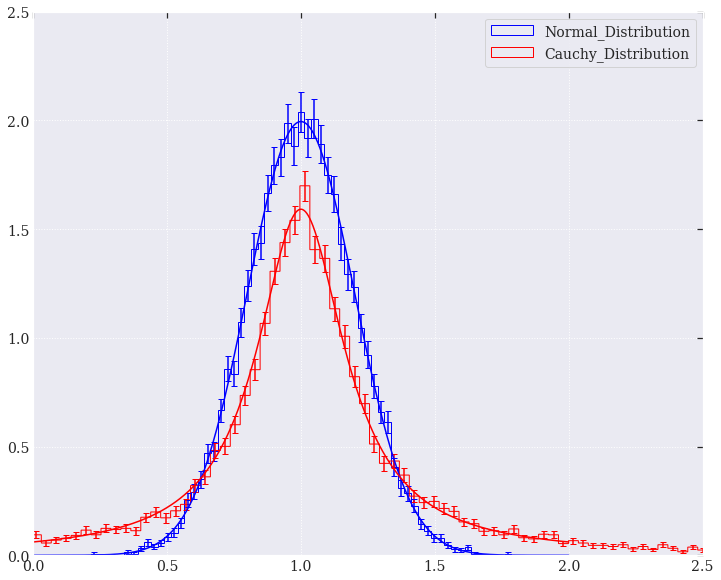

In [161]:
#Generate a sample of 10,000 data values drawn from N(𝜇=1.0,𝜎=0.2) and draw a histogram, with the bin size determined using the Freedman-Diaconis rule. Show (Poissonian) uncertainty for each histogram value, and overplot the true distribution. Do the same for a Cauchy distribution with the same  𝜇  and  𝛾=0.2 .

#Poissonian uncertainty: for each bin in the histogram, plot the error bar whose half-width is the square root of the bin height.

np.random.seed(42)
sample_size = 10000

fig, ax = plt.subplots(figsize = (12,10))

mu = 1.0
sigma = 0.2
gamma = 0.2

#RVS = chooses random sample from with sample size of 10000
#Norm = probability density function
#Cauchy = cauchy distribution
x = norm(mu, sigma).rvs(sample_size)
x_c = cauchy(mu, gamma).rvs(sample_size)

#Plot Freedman-Diaconis histogram
n, bins = np.histogram(x, bins = "fd")

#bins center and bins width
bincenters = 0.5 * (bins[1:] + bins[:-1])
binwidth = bins[1:] - bins[:-1]

#bins center and bins width
n_c, bins_c = np.histogram(x_c, bins = "fd")
bincenters_c = 0.5 * (bins_c[1:] + bins_c[:-1])
binwidth_c = bins_c[1:] - bins_c[:-1]

#Plot the error bar whose half-width is the square root of the bin height - Freedman-Diaconis
error_bar = np.sqrt(n) 
n = n / (binwidth * sample_size)
error_bar = error_bar / (binwidth * sample_size)

#Plot the error bar whose half-width is the square root of the bin height - Cauchy
error_bar_c = np.sqrt(n_c)
n_c = n_c / (binwidth_c * sample_size)
error_bar_c = error_bar_c / (binwidth_c * sample_size)

#histogram
ax.hist(x, bins = "fd", histtype = "step", density = True, color = 'blue', label = "Normal_Distribution")
ax.hist(x_c, bins = "fd", histtype = "step", density = True, color = 'red', label = "Cauchy_Distribution")

#errorbar
ax.errorbar(bincenters, n, error_bar, LineStyle = 'none', color = 'blue')
ax.errorbar(bincenters_c, n_c, error_bar_c, LineStyle = 'none', color = 'red')

#x-y axis limit
ax.set_xlim(0,2.5)
ax.set_ylim(0,2.5)

x_1 = np.linspace(0,2,sample_size)

gaussian_distribution = norm(mu, sigma).pdf(x_1)
plt.plot(x_1, gaussian_distribution, ls = '-', c = 'blue')

cauchy_distribution = cauchy(mu, gamma).pdf(x_1)
plt.plot(x_1, cauchy_distribution, ls = '-', c = 'red')

plt.legend();

## Problem 4

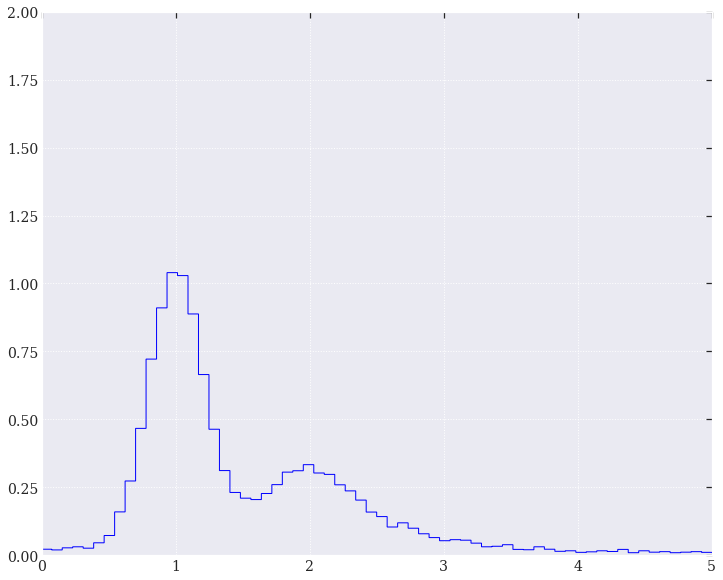

In [162]:
#generate random seed
np.random.seed(42)

#mu and gamma values for question 4
Q4_mu = 2.0
Q4_gamma = 0.5

#cauchy distribution
Q4_cauchy = cauchy(Q4_mu,Q4_gamma).rvs(sample_size)

#Concatenate previous distribution with this cauchy distribution and parameters
Q4_concatenate = np.concatenate([x,Q4_cauchy])

#subplot
fig, ax = plt.subplots(figsize = (12,10))

#x-y axis limit
ax.set_xlim(0,5)
ax.set_ylim(0,2)

#setting up histogram - fd
N_c, Bins_c = np.histogram(Q4_concatenate, bins = "fd")

#bin center and width
bincenter_concatenate = 0.5 * (Bins_c[:1] + Bins_c[:-1])
binwidth_concatenate = Bins_c[1:] - Bins_c[:-1]

#error bar
error_bar_C = np.sqrt(N_c)
N_c = (N_c/2) / (binwidth_concatenate * sample_size) #normalize

error_bar_C = error_bar_C / (binwidth_concatenate * sample_size)

#plot
ax.hist(Q4_concatenate, bins = "fd", histtype = "step", density = True, color = 'blue')

ax.errorbar(bincenter_concatenate, N_c, error_bar_C, LineStyle = "none", color = 'red');


#MY ERROR BARS ARE NOT SHOWING AND I DO NOT UNDERSTAND WHY. THE CODE IS THERE AND IT WORKED FOR Q3, BUT ITS NOT SHOWING UP HERE.

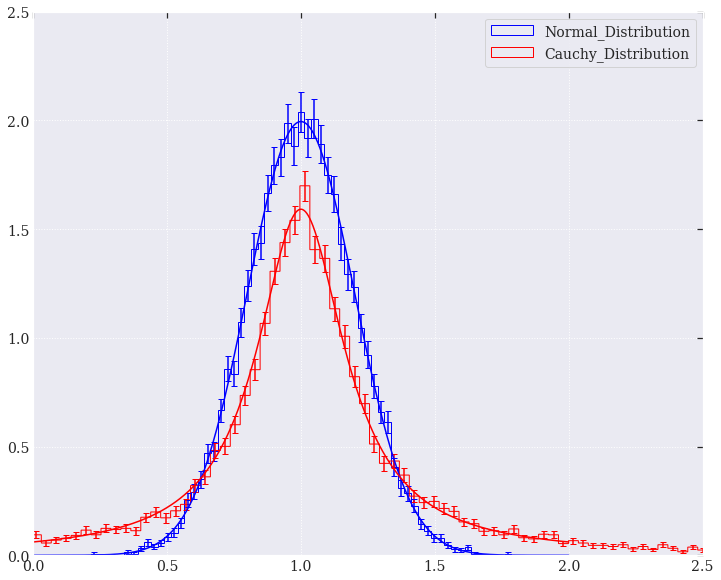

In [163]:
np.random.seed(42)
sample_size = 10000

fig, ax = plt.subplots(figsize = (12,10))

mu = 1.0
sigma = 0.2
gamma = 0.2

#RVS = chooses random sample from with sample size of 10000
#Norm = probability density function
#Cauchy = cauchy distribution
x = norm(mu, sigma).rvs(sample_size)
x_c = cauchy(mu, gamma).rvs(sample_size)

#Plot Freedman-Diaconis histogram
n, bins = np.histogram(x, bins = "fd")

#bins center and bins width
bincenters = 0.5 * (bins[1:] + bins[:-1])
binwidth = bins[1:] - bins[:-1]

#bins center and bins width
n_c, bins_c = np.histogram(x_c, bins = "fd")
bincenters_c = 0.5 * (bins_c[1:] + bins_c[:-1])
binwidth_c = bins_c[1:] - bins_c[:-1]

#Plot the error bar whose half-width is the square root of the bin height - Freedman-Diaconis
error_bar = np.sqrt(n) 
n = n / (binwidth * sample_size)
error_bar = error_bar / (binwidth * sample_size)

#Plot the error bar whose half-width is the square root of the bin height - Cauchy
error_bar_c = np.sqrt(n_c)
n_c = n_c / (binwidth_c * sample_size)
error_bar_c = error_bar_c / (binwidth_c * sample_size)

#histogram
ax.hist(x, bins = "fd", histtype = "step", density = True, color = 'blue', label = "Normal_Distribution")
ax.hist(x_c, bins = "fd", histtype = "step", density = True, color = 'red', label = "Cauchy_Distribution")

#errorbar
ax.errorbar(bincenters, n, error_bar, LineStyle = 'none', color = 'blue')
ax.errorbar(bincenters_c, n_c, error_bar_c, LineStyle = 'none', color = 'red')

#x-y axis limit
ax.set_xlim(0,2.5)
ax.set_ylim(0,2.5)

x_1 = np.linspace(0,2,sample_size)

gaussian_distribution = norm(mu, sigma).pdf(x_1)
plt.plot(x_1, gaussian_distribution, ls = '-', c = 'blue')

cauchy_distribution = cauchy(mu, gamma).pdf(x_1)
plt.plot(x_1, cauchy_distribution, ls = '-', c = 'red')

plt.legend();

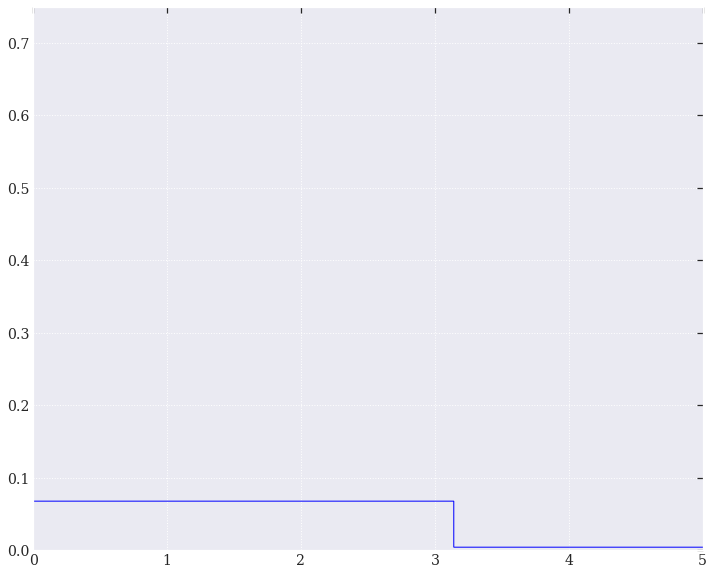

In [164]:
#generate random seed
np.random.seed(42)

#mu and gamma values for question 4
Q4_mu = 2.0
Q4_gamma = 0.5

#cauchy distribution
Q4_cauchy = cauchy(Q4_mu,Q4_gamma).rvs(sample_size)

#Concatenate previous distribution with this cauchy distribution and parameters
Q4_concatenate = np.concatenate([x,Q4_cauchy])

#subplot
fig, ax = plt.subplots(figsize = (12,10))

#x-y axis limit
ax.set_xlim(0,5)
ax.set_ylim(0,0.75)

#setting up histogram - fd
N_c, Bins_c = np.histogram(Q4_concatenate, bins = "scott")

#bin center and width
bincenter_concatenate = 0.5 * (Bins_c[:1] + Bins_c[:-1])
binwidth_concatenate = Bins_c[1:] - Bins_c[:-1]

#error bar
error_bar_C = np.sqrt(N_c)
N_c = (N_c/2) / (binwidth_concatenate * sample_size) #normalize

error_bar_C = error_bar_C / (binwidth_concatenate * sample_size)

#plot
ax.hist(Q4_concatenate, bins = "scott", histtype = "step", density = True, color = 'blue')

ax.errorbar(bincenter_concatenate, N_c, error_bar_C, LineStyle = "none", color = 'red');


In [165]:
#Scott = the outliers in the distribution will result in the wide bins that we see here when we generate the same sample size with scott.